<a href="https://colab.research.google.com/github/sanjeevKaruppaiah/mlops-project-image-classification/blob/main/defect%20detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anamoly defect detection**


In [4]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

In [6]:
os.getcwd
os.listdir

<function posix.listdir(path=None)>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nexuswho/fabric-defects-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.09G/2.09G [00:18<00:00, 121MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1


In [7]:
import os

# List the contents of the dataset directory
dataset_contents = os.listdir(path)
print("Contents of the dataset directory:")
for item in dataset_contents:
    print(item)

# Identify subdirectories (defect types)
defect_types = [item for item in dataset_contents if os.path.isdir(os.path.join(path, item))]
print("\nIdentified defect types (subdirectories):")
for defect_type in defect_types:
    print(defect_type)

Contents of the dataset directory:
Fabric Defects Dataset

Identified defect types (subdirectories):
Fabric Defects Dataset


**Reasoning**:
Based on the previous output, the dataset seems to be within a single subdirectory named "Fabric Defects Dataset". I need to list the contents of this subdirectory to find the actual defect type folders.



In [8]:
# List the contents of the 'Fabric Defects Dataset' subdirectory
dataset_subdir_path = os.path.join(path, "Fabric Defects Dataset")
subdir_contents = os.listdir(dataset_subdir_path)
print(f"Contents of the '{dataset_subdir_path}' directory:")
for item in subdir_contents:
    print(item)

# Identify the actual defect types (subdirectories) within this subdirectory
actual_defect_types = [item for item in subdir_contents if os.path.isdir(os.path.join(dataset_subdir_path, item))]
print("\nIdentified actual defect types (subdirectories):")
for defect_type in actual_defect_types:
    print(defect_type)

Contents of the '/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset' directory:
Fabric Defect Dataset

Identified actual defect types (subdirectories):
Fabric Defect Dataset


In [9]:
# List the contents of the 'Fabric Defect Dataset' subdirectory
actual_dataset_path = os.path.join(dataset_subdir_path, "Fabric Defect Dataset")
final_subdir_contents = os.listdir(actual_dataset_path)
print(f"Contents of the '{actual_dataset_path}' directory:")
for item in final_subdir_contents:
    print(item)

# Identify the final subdirectories (defect types) within this subdirectory
final_defect_types = [item for item in final_subdir_contents if os.path.isdir(os.path.join(actual_dataset_path, item))]
print("\nIdentified final defect types (subdirectories):")
for defect_type in final_defect_types:
    print(defect_type)

Contents of the '/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset' directory:
defect free
Vertical
stain
lines
horizontal
hole

Identified final defect types (subdirectories):
defect free
Vertical
stain
lines
horizontal
hole


In [10]:
# Define the base path to the dataset
base_path = os.path.join(path, "Fabric Defects Dataset", "Fabric Defect Dataset")

# Create an empty dictionary to store the counts for each category
defect_counts = {}

# Iterate through the final defect type directories and count images
for defect_type in final_defect_types:
    defect_type_path = os.path.join(base_path, defect_type)
    # List contents and count files (assuming all files are images)
    image_count = len([f for f in os.listdir(defect_type_path) if os.path.isfile(os.path.join(defect_type_path, f))])
    defect_counts[defect_type] = image_count

# Print the counts for each category
print("Image counts per defect category:")
for defect_type, count in defect_counts.items():
    print(f"{defect_type}: {count}")

Image counts per defect category:
defect free: 1666
Vertical: 101
stain: 398
lines: 157
horizontal: 136
hole: 281


## Create pie chart



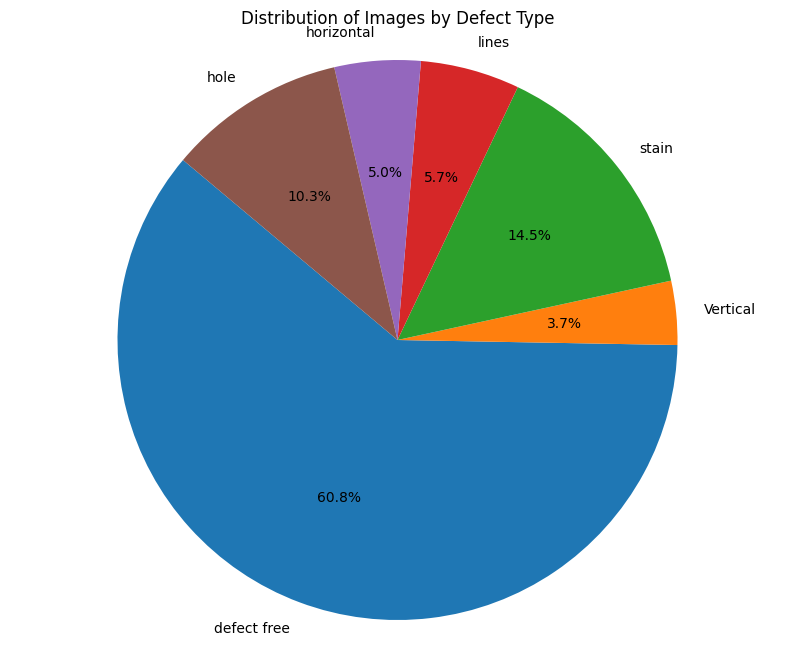

In [11]:
labels = list(defect_counts.keys())
sizes = list(defect_counts.values())

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images by Defect Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
# Define the base path to the dataset
import os

# Path to your main dataset folder
dataset_path = actual_dataset_path  # or you can put your path as a string

# Loop through all folders and subfolders
for root, dirs, files in os.walk(dataset_path):
    print(f"\n📁 Directory: {root}")

    # Filter only image files (optional but helpful)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Take only the first 10 images
    sample_images = image_files[:10]

    # Print their full paths
    for file in sample_images:
        print(os.path.join(root, file))



📁 Directory: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset

📁 Directory: /root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/fbf05761b7a1f9e60818283105.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/23a6e743b19b343a0904123962.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/46b5608ddcfe974a0831390813.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/477b972ccfb034b71553208831.jpg
/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/vers

In [18]:
sample_image_path = "/root/.cache/kagglehub/datasets/nexuswho/fabric-defects-dataset/versions/1/Fabric Defects Dataset/Fabric Defect Dataset/defect free/fbf05761b7a1f9e60818283105.jpg"
img = Image.open(sample_image_path)
img.show()
print(img.size)

(2446, 1000)


In [33]:
from torchvision.transforms import transforms

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

    #assuming "image"is a PIL image object
    #apply the defined transformation pipeline to the image
img=transform(img)
print(img.shape)

ValueError: Operation on closed image

In [31]:
from torchvision.transforms import transforms

## Summary:

### Data Analysis Key Findings

*   The dataset is organized into subdirectories representing different image categories: "defect free", "Vertical", "stain", "lines", "horizontal", and "hole".
*   The image counts for each category are: "defect free": 1666 images, "Vertical": 101 images, "stain": 398 images, "lines": 157 images, "horizontal": 136 images, and "hole": 281 images.
*   A pie chart was generated to visualize the distribution of images across these categories, showing the proportion of images in each defect type and the proportion of defect-free images.


